# Simple Harmonic Simulator
## Double Pendulum
https://tutorials.juliadiffeq.org/html/models/01-classical_physics.html

In [1]:
#Double Pendulum Problem
using OrdinaryDiffEq, Plots

In [6]:
#Constants and setup
const m₁, m₂, L₁, L₂ = 1, 2, 1, 2
const g = 9.81
initial = [0, π/3, 0, 3pi/5]
tspan = (0.,50.)

(0.0, 50.0)

In [7]:
#Convenience function for transforming from polar to Cartesian coordinates
function polar2cart(sol;dt=0.02,l1=L₁,l2=L₂,vars=(2,4))
    u = sol.t[1]:dt:sol.t[end]

    p1 = l1*map(x->x[vars[1]], sol.(u))
    p2 = l2*map(y->y[vars[2]], sol.(u))

    x1 = l1*sin.(p1)
    y1 = l1*-cos.(p1)
    (u, (x1 + l2*sin.(p2),
     y1 - l2*cos.(p2)))
end

polar2cart (generic function with 1 method)

In [8]:
#Define the Problem
function double_pendulum(xdot,x,p,t)
    xdot[1]=x[2]
    xdot[2]=-((g*(2*m₁+m₂)*sin(x[1])+m₂*(g*sin(x[1]-2*x[3])+2*(L₂*x[4]^2+L₁*x[2]^2*cos(x[1]-x[3]))*sin(x[1]-x[3])))/(2*L₁*(m₁+m₂-m₂*cos(x[1]-x[3])^2)))
    xdot[3]=x[4]
    xdot[4]=(((m₁+m₂)*(L₁*x[2]^2+g*cos(x[1]))+L₂*m₂*x[4]^2*cos(x[1]-x[3]))*sin(x[1]-x[3]))/(L₂*(m₁+m₂-m₂*cos(x[1]-x[3])^2))
end

double_pendulum (generic function with 1 method)

In [9]:
#Pass to Solvers
double_pendulum_problem = ODEProblem(double_pendulum, initial, tspan)
sol = solve(double_pendulum_problem, Vern7(), abs_tol=1e-10, dt=0.05)

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 302-element Array{Float64,1}:
  0.0                
  0.05               
  0.1223079052234777 
  0.21763564439678446
  0.32592132827555614
  0.45428546205171927
  0.609957416358271  
  0.7734779293497827 
  0.9540060574595153 
  1.1799033713407105 
  1.403442437872348  
  1.5857800225971301 
  1.7547534996346459 
  ⋮                  
 48.10013873938749   
 48.26086940221816   
 48.51276681735055   
 48.68829170708072   
 48.90897270610238   
 49.074198457665524  
 49.26762992059672   
 49.41331132773069   
 49.58656471302393   
 49.73635419325158   
 49.929069338760755  
 50.0                
u: 302-element Array{Array{Float64,1},1}:
 [0.0, 1.0471975511965976, 0.0, 1.8849555921538759]                                   
 [0.05276815671595484, 1.071438957072351, 0.09384176137401032, 1.8607344940613866]    
 [0.13361722361756873, 1.1748571429557286, 0.2248435889699277, 1.749602555594999]     
 [0.253755461175544

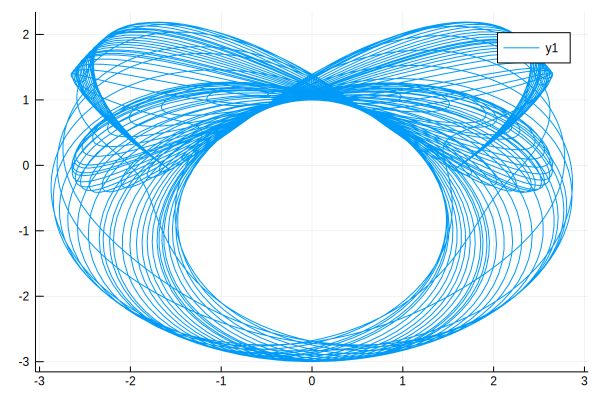

In [10]:
#Obtain coordinates in Cartesian Geometry
ts, ps = polar2cart(sol, l1=L₁, l2=L₂, dt=0.01)
plot(ps...)